# Linear Regression using Scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
x=df[['TV']].values
type(x)

numpy.ndarray

In [8]:
y=df[['sales']].values
type(y)


numpy.ndarray

In [9]:
lin_reg_model=LinearRegression()

In [10]:
print(dir(lin_reg_model))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_set_intercept', '_validate_data', '_validate_params', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'n_jobs', 'positive', 'predict', 'score', 'set_params']


building the model

In [11]:
a=lin_reg_model.fit(x,y)
a

LinearRegression()

In [12]:
print(dir(a))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_set_intercept', '_validate_data', '_validate_params', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_features_in_', 'n_jobs', 'positive', 'predict', 'rank_', 'score', 'set_params', 'singular_']


In [13]:
a.coef_

array([[0.04753664]])

In [14]:
a.intercept_

array([7.03259355])

In [15]:
print("Linear Model is Y=",a.coef_,"*x+",a.intercept_)

Linear Model is Y= [[0.04753664]] *x+ [7.03259355]


check predictions

In [16]:
pred=lin_reg_model.predict(x)#all values
pred
pred=lin_reg_model.predict(x[[2]])#single value
pred

array([[7.85022376]])

In [17]:
score=lin_reg_model.score(x,y)

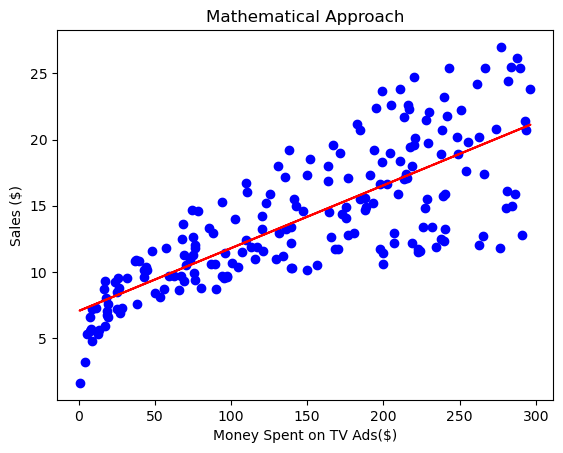

In [18]:
plt.scatter(df['TV'],df['sales'],color='blue',label="Input data")
plt.plot(df['TV'],lin_reg_model.predict(x),color='red',label="Regression line")
plt.xlabel("Money Spent on TV Ads($)")
plt.ylabel("Sales ($)")
plt.title("Mathematical Approach")
plt.show()

considering all the 3 columns

In [19]:
x=df.iloc[:,:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [20]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

model selection:dividing data into training and testing

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
a,b=np.arange(10).reshape(5,2),range(5)
print(a)
print(b)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
range(0, 5)


In [23]:
train_test_split(a,b)#changes for every execution

[array([[4, 5],
        [6, 7],
        [0, 1]]),
 array([[2, 3],
        [8, 9]]),
 [2, 3, 0],
 [1, 4]]

In [24]:
train_test_split(a,b,random_state=1)#consistent #random_state=42(highly)

[array([[8, 9],
        [0, 1],
        [6, 7]]),
 array([[4, 5],
        [2, 3]]),
 [4, 0, 3],
 [2, 1]]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [26]:
x_train

,TV,radio,newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8
...,...,...,...
133,219.8,33.5,45.1
137,273.7,28.9,59.7
72,26.8,33.0,19.3
140,73.4,17.0,12.9


building model
we use train data only after splitting

In [27]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

checking the predictions

In [28]:
pred=lin_reg_model.predict(x_test)

check the metrics cost function-->R^2 value

In [29]:
from sklearn.metrics import r2_score

R^2 value

In [30]:
r2_score(y_test,pred)

0.9224605706201434

In [31]:
print(r2_score(y_test,pred)*100)

92.24605706201434


Difference b/w actual values and predicted values

In [32]:
data=pd.DataFrame({'Actual':y_test,
                'Predicted':pred,
                'Difference':y_test-pred})
data

,Actual,Predicted,Difference
58,23.8,21.663183,2.136817
40,16.6,16.441379,0.158621
34,9.5,7.691446,1.808554
102,14.8,17.916317,-3.116317
184,17.6,18.670471,-1.070471
198,25.5,23.791993,1.708007
95,16.9,16.282543,0.617457
4,12.9,13.441387,-0.541387
29,10.5,9.152940,1.347060
168,17.1,17.324753,-0.224753
